In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

house_price_dataset = sklearn.datasets.fetch_california_housing()
print(house_price_dataset)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
12069  4.2386       6.0  7.723077   1.169231       228.0  3.507692     33.83   
15925  4.3898      52.0  5.326622   1.100671      1485.0  3.322148     37.73   
11162  3.9333      26.0  4.668478   1.046196      1022.0  2.777174     33.83   
4904   1.4653      38.0  3.383495   1.009709       749.0  3.635922     34.01   
4683   3.1765      52.0  4.119792   1.043403      1135.0  1.970486     34.08   
...       ...       ...       ...        ...         ...       ...       ...   
13123  4.4125      20.0  6.000000   1.045662       712.0  3.251142     38.27   
19648  2.9135      27.0  5.349282   0.933014       647.0  3.095694     37.48   
9845   3.1977      31.0  3.641221   0.941476       704.0  1.791349     36.58   
10799  5.6315      34.0  4.540598   1.064103      1052.0  2.247863     33.62   
2732   1.3882      15.0  3.929530   1.100671      1024.0  3.436242     32.80   

       Longitude    price  
12069    -1

<Figure size 720x720 with 0 Axes>

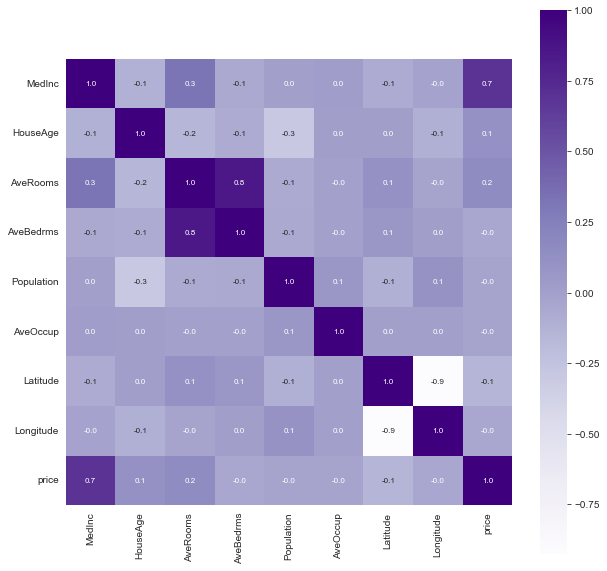

In [5]:
#load dataset to panda dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data,columns = house_price_dataset.feature_names) 
house_price_dataframe.head()

house_price_dataframe['price'] = house_price_dataset.target
house_price_dataframe.head()

X = house_price_dataframe
Y = house_price_dataset.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print (X_train, X_train.shape, X_test.shape)

model = LinearRegression()
model.fit(X_train, Y_train)

training_data_predictions = model.predict(X_train)
print(training_data_predictions)
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

house_price_dataframe.describe()
correlation = house_price_dataframe.corr()


plt.figure(figsize=(10,10))
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']
print (X,Y)

1.0
2.883701265234118e-14


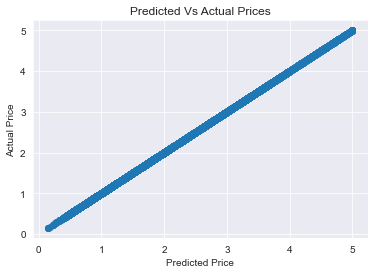

In [7]:
#R squared error
score_1 = metrics.r2_score(Y_train, training_data_predictions)

#absolute mean error
score_2 = metrics.mean_absolute_error (Y_train, training_data_predictions)

print (score_1)
print (score_2)

plt.scatter(Y_train, training_data_predictions)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title('Predicted Vs Actual Prices')
plt.show()

In [8]:
mse = mean_squared_error
r2 = r2_score
print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")
print ("coefficients:", model.coef_)
print ("Intercept:", model.intercept_)

Mean squared error: <function mean_squared_error at 0x7fe71baa6310>
R-squared: <function r2_score at 0x7fe71baa6670>
coefficients: [-3.47074842e-15 -2.24820162e-15  2.18575158e-15 -3.81530744e-15
  1.38777878e-17  5.15944709e-17 -3.46944695e-16  5.71374545e-17
  1.00000000e+00]
Intercept: 6.750155989720952e-14
